# Final exam
_Larissa Driemeier, Izabel F. Machado_
 ![](https://drive.google.com/uc?export=view&id=1D5NMNp-KTfou5cSIiDdXwdDDTzRGzToq)


In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import decomposition
from sklearn import cluster
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib.request as request
import io
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

## *K*-means clustering algorithm

*K*-means clustering is one of the simplest and popular **unsupervised machine learning algorithms**. *Cluster* refers to a collection of data points aggregated together because of certain similarities. See the figure below, with 3 clusters.

 ![](https://drive.google.com/uc?export=view&id=1CTwgd-m_QN52UaQafZTkLyzblLofRw0L)


Maybe you remember our first ML class, when we defined what is an unsupervised algorithm: it makes inferences from datasets using *only input vectors*, without referring to labelled outputs.

The objective of *k*-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, the *k*-means algorithm aims to choose *centroids* that minimise the inertia, or within-cluster sum-of-squares criterion:

$$
\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)
$$
where $n$ is the number of samples in your dataset, and the expression minimizes the squares of the difference between each sample $x_i$ and the mean $\mu_j$ of a particular cluster $C$. Inertia can be recognized as a measure of how internally coherent clusters are.

In this way, in *k*-means algorithm: 
* each cluster is defined in terms of its centroid, which is the arithmetic mean of all the points belonging to the cluster;
* every data point is allocated to the nearest cluster, while keeping the centroids as small as possible. That is, each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model. To visualize better the *k*-means algorithm, see the video [here](https://www.youtube.com/watch?v=IJt62uaZR-M&feature=youtu.be).

When this value is minimized, the clusters are said to be internally coherent (Scikit-learn, n.d.) and movement in the “centroid correction” step will be low. If it’s zero, it has converged to an optimum. In Scikit, we specify a certain threshold value which, if the inertia is lower, considers the algorithm to have converged. This speeds up the fitting process.



We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs.
To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

K-means looks for a fixed number $(k)$ of cluster centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The *means* in the K-means refers to averaging of the data; that is, finding the centroid.

## Example 01: 5 clusters with artificial data

5 clouds are randomly created on the plane.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


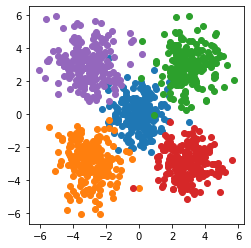

In [2]:
p1 = np.random.multivariate_normal([0,0], [[1,0], [0,1]],200)
p2 = np.random.multivariate_normal([-3,-3], [[1,0], [0,1]],200)
p3 = np.random.multivariate_normal([3,3], [[1,0], [0,1]],200)
p4 = np.random.multivariate_normal([3,-3], [[1,0], [0,1]],200)
p5 = np.random.multivariate_normal([-3,3], [[1,0], [0,1]],200)
plt.scatter(p1[:,0], p1[:,1])
plt.scatter(p2[:,0], p2[:,1])
plt.scatter(p3[:,0], p3[:,1])
plt.scatter(p4[:,0], p4[:,1])
plt.scatter(p5[:,0], p5[:,1])
plt.axes().set_aspect('equal')

These clouds are combined into one. Note that there is still an underlying distinguishable structure with 5 clusters.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


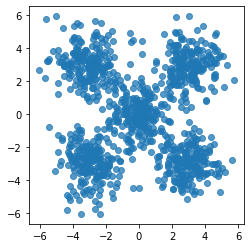

In [3]:
all_data = np.concatenate([p1,p2,p3,p4,p5])
plt.scatter(all_data[:,0],all_data[:,1], alpha=0.75)
plt.axes().set_aspect('equal')

The `KMeans` object from the `sklearn` library solves the problem of finding a partition for the point set with minimal variance.

The constructor parameter `n_clusters` specifies the number of clusters.

The underlying heuristic is random. The `n_init` parameter specifies how many times the problem must be solved. The final solution is the one with the lowest total variance within each set. This value can be obtained in the attribute `inertia_`. 

Note that, in our artificial example, its mean value approximates the total variance of each one of the original clusters.

The average values of each cluster are in the `cluster_centers_` attribute of the object.

1.895994879877254
[[-3.11228563  3.09616573]
 [ 2.94549588 -2.94826695]
 [-2.95202402 -3.01090753]
 [ 3.02943336  2.97489546]
 [-0.05712801  0.01506   ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


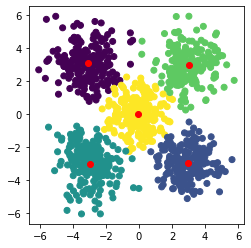

In [4]:
model = cluster.KMeans(n_clusters=5, n_init=10)
model.fit(all_data)
plt.scatter(all_data[:,0], all_data[:,1], c=model.predict(all_data))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
plt.axes().set_aspect('equal')
print(model.inertia_/all_data.shape[0])
print(model.cluster_centers_)

### Variable number of clusters

Naturally, the greater the number of sets in the partition, the smaller the total variance, up to the limit that each cluster corresponds to a point in the original data set.

For example, here's a decomposition into 20 cluster. Note that the variance metric is significantly less.

0.6400435312683171


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


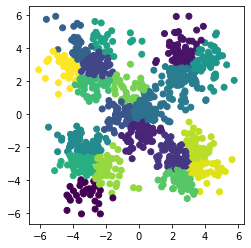

In [5]:
model = cluster.KMeans(n_clusters=20,  n_init=30)
model.fit(all_data)
plt.scatter(all_data[:,0], all_data[:,1], c=model.predict(all_data))
plt.axes().set_aspect('equal')
print(model.inertia_/all_data.shape[0])

The problem of determining the appropriate number of clusters is recurrent in cluster analysis, and has no easy solution.

In fact, the problem statement itself is difficult. What does the *best* number of partitions mean?

In the above problem, it is clear that we have 5 partitions, but, normally, it does not happen.

It is a *rule of thumb* choosing the maximum number of partitions from which *there is no significant gain*, leading to terms such as *elbow curve*. But, as will be seen, this is a *subjective* criterion.

Yes, contrary to what you may have heard, *there is* no mathematical definition of an *elbow point*.

The so-called *elbow curve* is the curve of number of clusters *versus* total variance. The idea is that this curve would look like an arm and it would have an *elbow* at the optimal group point.

Here is the *elbow curve* for the data above:

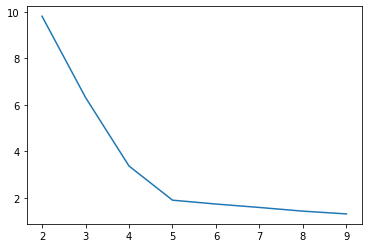

In [7]:
clusters = []
distortions = []
for i in range(2,10):
  model = cluster.KMeans(n_clusters=i, n_init=30)
  model.fit(all_data)
  clusters.append(i)
  distortions.append(model.inertia_/all_data.shape[0])
  
plt.plot(clusters,distortions)

It can be argued that there is one "elbow" in 5, but is there not another in 4?
But these data were specially prepared for this segmentation to be obvious.

What happens when it is less obvious?

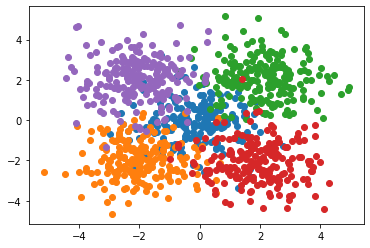

In [8]:
p1 = np.random.multivariate_normal([0,0], [[1,0], [0,1]],200)
p2 = np.random.multivariate_normal([-2,-2], [[1,0], [0,1]],200)
p3 = np.random.multivariate_normal([2,2], [[1,0], [0,1]],200)
p4 = np.random.multivariate_normal([2,-2], [[1,0], [0,1]],200)
p5 = np.random.multivariate_normal([-2,2], [[1,0], [0,1]],200)
plt.scatter(p1[:,0], p1[:,1])
plt.scatter(p2[:,0], p2[:,1])
plt.scatter(p3[:,0], p3[:,1])
plt.scatter(p4[:,0], p4[:,1])
plt.scatter(p5[:,0], p5[:,1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


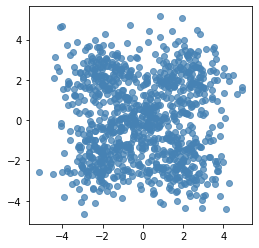

In [9]:
all_data = np.concatenate([p1,p2,p3,p4,p5])
plt.scatter(all_data[:,0], all_data[:,1], alpha=0.75, color = 'steelblue')
plt.axes().set_aspect('equal')

The clouds are getting confused in this example.
Now let's look at the *elbow curve*:

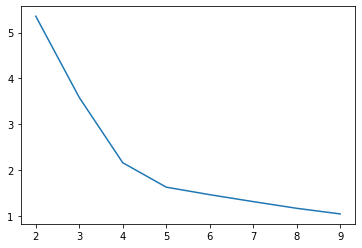

In [10]:
clusters = []
distortions = []
for i in range(2,10):
  model = cluster.KMeans(n_clusters=i, n_init=30)
  model.fit(all_data)
  clusters.append(i)
  distortions.append(model.inertia_/all_data.shape[0])

plt.plot(clusters,distortions)

And now, is the "elbow" at 4 or 5?
As stated above, * there is * no mathematical definition for this.

A well-defined performance index is the *Silhouette Score*.

For each point $x_i$ in the cluster, 
* $a(i)$ is the average distance between $x_i$ and all the other data points in the cluster to which $x_i$ belongs;
* $b(i)$ is the minimum average distance from $x_i$ to all clusters to which $x_i$ does not belong.

The silhouette coefﬁcient $s(i)$ for the particular data point $x_i$ is given by:

\begin{equation}
s(i) = \frac{b(i)-a(i)}{\max{\{a(i),b(i)}\}}
\end{equation}

In addition, $s(i)=0$ for the points that belong to single clusters.
It is shown that by definition, $-1 \leq s(i) \leq 1$.

Furthermore, the *higher* the silhouette coefﬁcient of a given point, the closer it is to the points in its cluster and the more distant from the others. So, score of $1$ denotes that the data point $x_i$ is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is $-1$. Values near $0$ denote overlapping clusters.

The average SS can be calculated for different partitions and so you can choose the number of sets that maximize this index.

The function `metrics.silhouette_score(points, classification)` calculates the average silhouette index for the cluster in the `points` matrix grouped according to the indexes in `classification`.

Here is an average silhouette index graph for the above problem points.

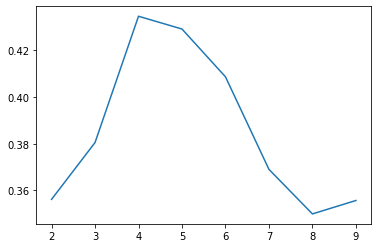

In [ ]:
clusters = []
distortions = []
for i in range(2,10):
  model = cluster.KMeans(n_clusters=i, n_init=30)
  model.fit(all_data)
  clusters.append(i)
  distortions.append(metrics.silhouette_score(all_data, model.predict(all_data)))

plt.plot(clusters,distortions)

Here is a code extracted from the [link](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html), with a more common silhouette index visualization.

For n_clusters = 2 The average silhouette_score is : 0.3566902022113292
For n_clusters = 3 The average silhouette_score is : 0.3680506226105207
For n_clusters = 4 The average silhouette_score is : 0.43869115157854366
For n_clusters = 5 The average silhouette_score is : 0.44017639867283265
For n_clusters = 6 The average silhouette_score is : 0.3960396173540054


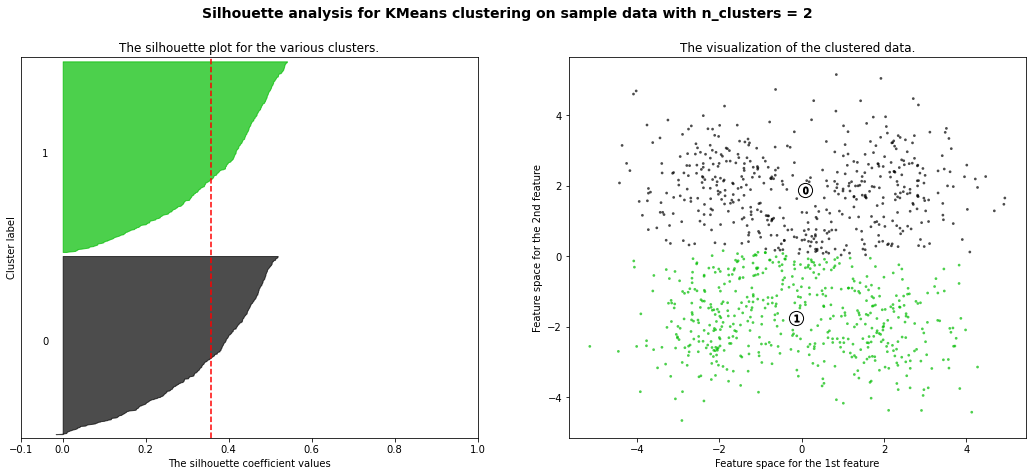

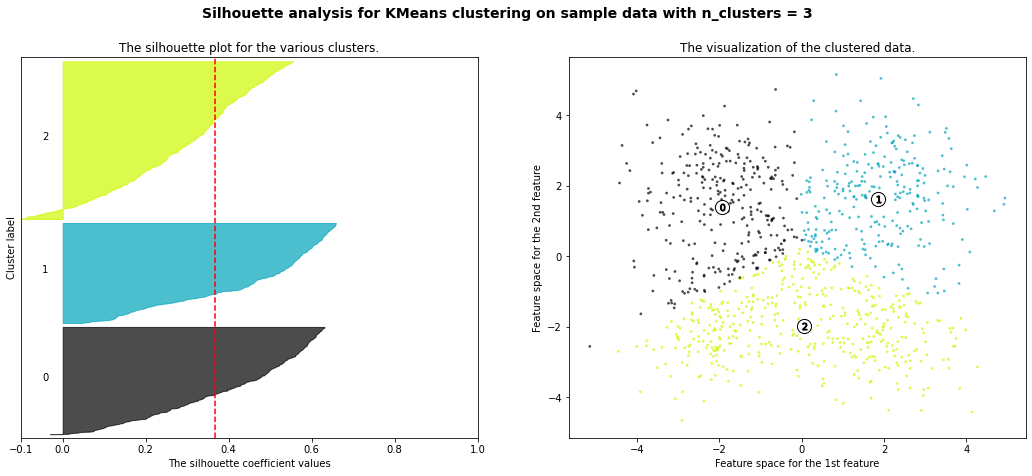

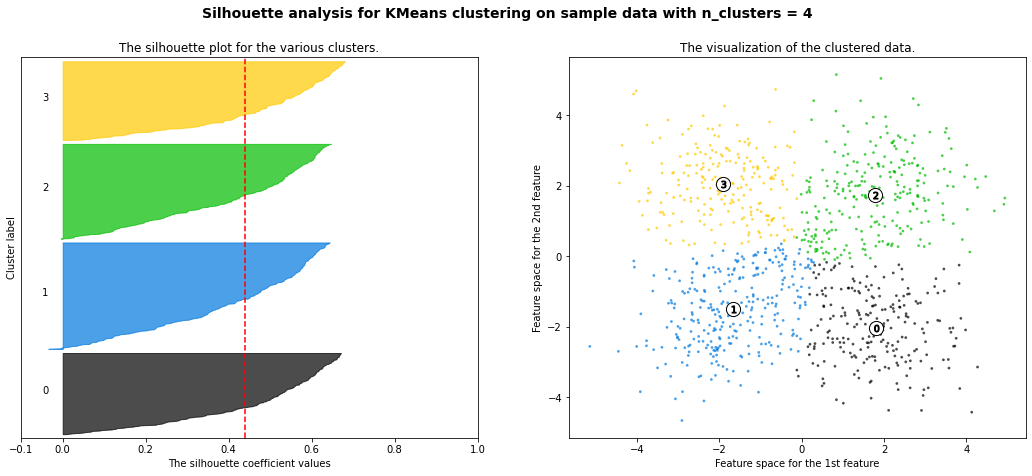

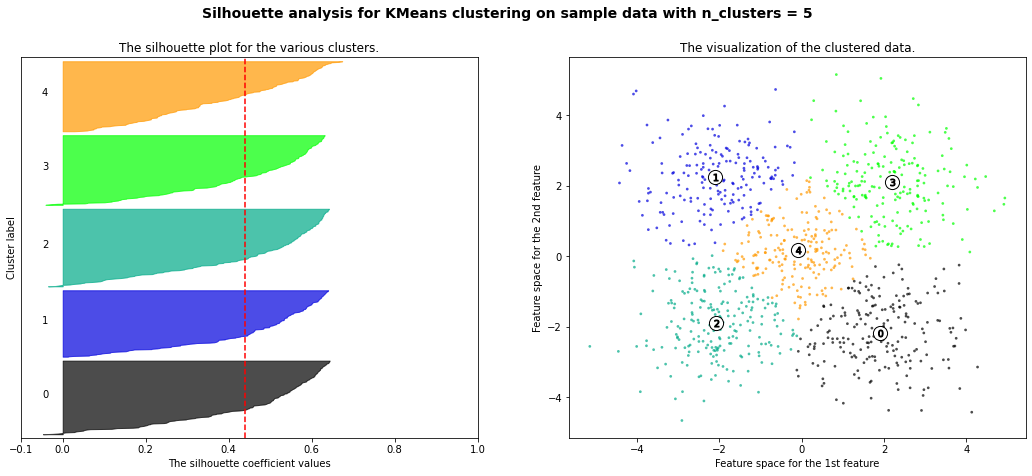

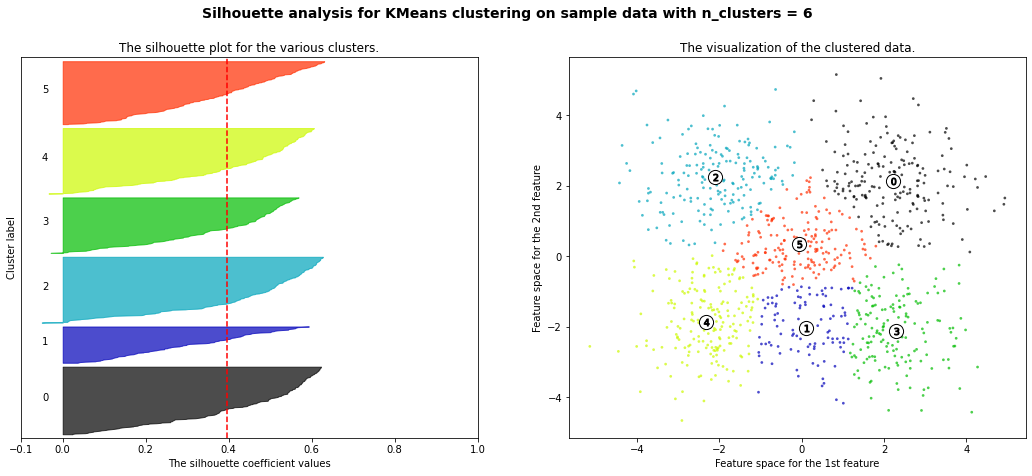

In [28]:
range_n_clusters = [2, 3, 4, 5, 6]
X = all_data
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Example 2: *k*-means for color compression

This example was extracted from this [link](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb#scrollTo=KOp3NJVEC4T8). It is just an interesting illustration about *k* means. You don't need to understand all steps.

One interesting application of clustering is in color compression within images.
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

For example, consider the image shown in the following figure, which is from the Scikit-Learn ``datasets`` module (for this to work, you'll have to have the ``pillow`` Python package installed).

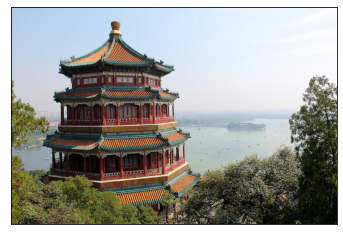

In [29]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

The image itself is stored in a three-dimensional array of size `(height, width, RGB)`, containing red / blue / green contributions as integers from 0 to 255:

In [30]:
china.shape

(427, 640, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space.
We will reshape the data to `[n_samples x n_features]`, and rescale the colors so that they lie between 0 and 1:

In [31]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [32]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

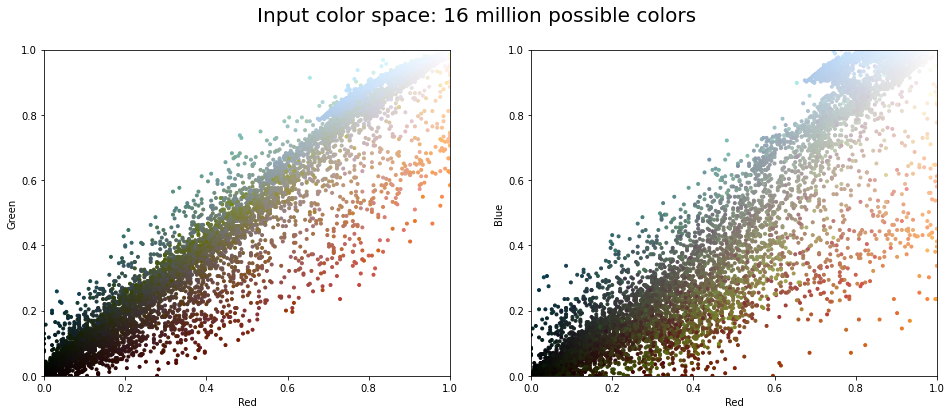

In [33]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Now let's reduce these 16 million colors to just 16 colors, using a *k*-means clustering across the pixel space.

Because we are dealing with a very large dataset, we will use the mini batch *k*-means.

The `MiniBatchKMeans` is a variant of the `KMeans` algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of *k*-means, mini-batch *k*-means produces results that are generally only slightly worse than the standard algorithm.

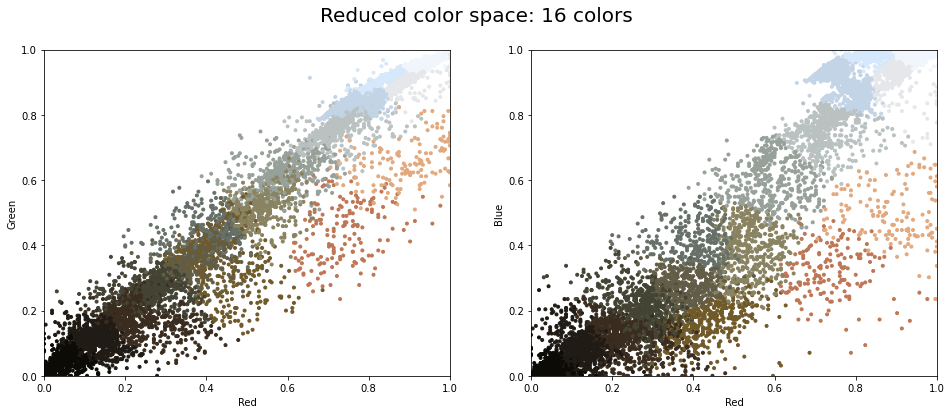

In [34]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

The result is a re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center.
Plotting these new colors in the image space rather than the pixel space shows us the effect of this:

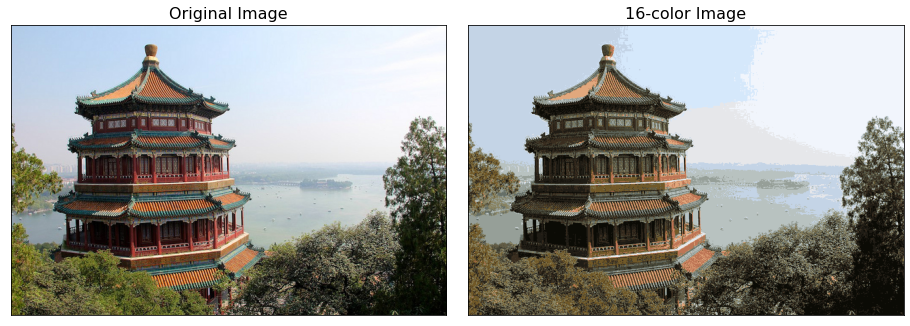

In [35]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable.
This image on the right achieves a compression factor of around 1 million!
While this is an interesting application of *k*-means, there are certainly better way to compress information in images.
But the example shows the power of thinking outside of the box with unsupervised methods like *k*-means.

##__Your Exercise__

17-4 PH stainless steel provides excellent mechanical properties for applications requiring high strength and hardness plus corrosion resistance.

Different heat treatments  can optimize mechanical properties as well as they may be conducted to improve the machinability. Results of mechanical properties of 17-4PH steel obtained after different heat treatments are available in the file `data.csv`.

Based on this dataset, answer the questions:

1. How many heat treatments can be identified in the dataset?
2. For each different heat treatment of 17-4PH steel, define the average yield stress, strength and elongation, and respective standard deviations   each heat treatment.


 ![](https://drive.google.com/uc?export=view&id=1LyzvOw6kyGYaUmSOAbL26-kjaL9ca3b-)
